In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys


sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from attacks import utils
from utils import labels_util
from attacks import eot_attacks

In [29]:
!ls

eot_attack_pubfig.ipynb
eot_attacks.ipynb
eot_dpr_pubfig_attack.ipynb
eot_evaluation.ipynb
experiments_analysis.ipynb
facenet_dpr_pubfig.ipynb
indoor_scenes_eot_attack_eval.ipynb
pubfig10_pubfig_facenet_dpr_results2.csv
pubfig10_pubfig_facenet_dpr_results3_bis.csv
pubfig10_pubfig_facenet_dpr_results3.csv
pubfig10_pubfig_facenet_dpr_results4.csv
pubfig10_pubfig_facenet_dpr_results.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results2.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results3_bis.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results3.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results4.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results.csv
README.md
untitled.txt


## Analysing the results of the experiments

In [3]:
!ls

eot_attack_pubfig.ipynb
eot_attacks.ipynb
eot_dpr_pubfig_attack.ipynb
eot_evaluation.ipynb
facenet_dpr_pubfig.ipynb
indoor_scenes_eot_attack_eval.ipynb
pubfig10_pubfig_facenet_dpr_results2.csv
pubfig10_pubfig_facenet_dpr_results3_bis.csv
pubfig10_pubfig_facenet_dpr_results3.csv
pubfig10_pubfig_facenet_dpr_results.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results2.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results3_bis.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results3.csv
pubfig10_pubfig_facenet_multi_illumination_murmann_results.csv
README.md
Untitled.ipynb
untitled.txt


In [30]:
idx_to_label = labels_util.load_idx_to_label('pubfig10')

df = pd.read_csv('pubfig10_pubfig_facenet_multi_illumination_murmann_results4.csv')

In [31]:
df

,eps,gt_label,orig_label,target_label,adv_label,orig_prob,root_prob,adv_prob
0,0.1,5,5,1,1,0.981108,0.973223,0.940964
1,0.1,5,5,1,1,0.678668,0.960868,0.857360
2,0.1,5,5,1,1,0.956457,0.974804,0.750538
3,0.1,5,5,1,1,0.499059,0.878097,0.787619
4,0.1,6,6,1,1,0.506382,0.956259,0.959013
5,0.1,6,6,1,1,0.988156,0.960828,0.947039
6,0.1,6,6,1,1,0.968568,0.969092,0.777267
7,0.1,6,6,1,1,0.977061,0.970174,0.812026
8,0.1,0,0,1,1,0.994756,0.990979,0.839753
9,0.1,0,0,1,1,0.881529,0.963003,0.912169


In [32]:
df['successful_attack'] = (df['orig_label'] == df['gt_label']) & (df['adv_label'] == df['target_label'])
df

,eps,gt_label,orig_label,target_label,adv_label,orig_prob,root_prob,adv_prob,successful_attack
0,0.1,5,5,1,1,0.981108,0.973223,0.940964,True
1,0.1,5,5,1,1,0.678668,0.960868,0.857360,True
2,0.1,5,5,1,1,0.956457,0.974804,0.750538,True
3,0.1,5,5,1,1,0.499059,0.878097,0.787619,True
4,0.1,6,6,1,1,0.506382,0.956259,0.959013,True
5,0.1,6,6,1,1,0.988156,0.960828,0.947039,True
6,0.1,6,6,1,1,0.968568,0.969092,0.777267,True
7,0.1,6,6,1,1,0.977061,0.970174,0.812026,True
8,0.1,0,0,1,1,0.994756,0.990979,0.839753,True
9,0.1,0,0,1,1,0.881529,0.963003,0.912169,True


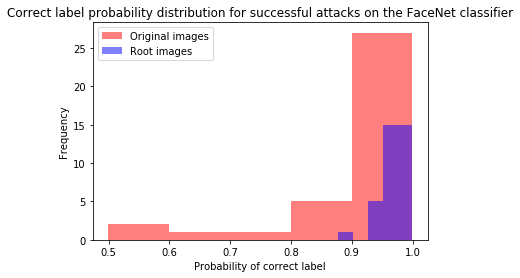

In [33]:
ax = df[df['successful_attack']]['orig_prob'].plot.hist(bins=5, alpha=0.5, color='red', label='Original images')
df[df['successful_attack']]['root_prob'].plot.hist(axes=ax, bins=5, alpha=0.5, color='blue', label='Root images')
ax.set_xlabel('Probability of correct label')
plt.title('Correct label probability distribution for successful attacks on the FaceNet classifier')
plt.legend()
plt.show()

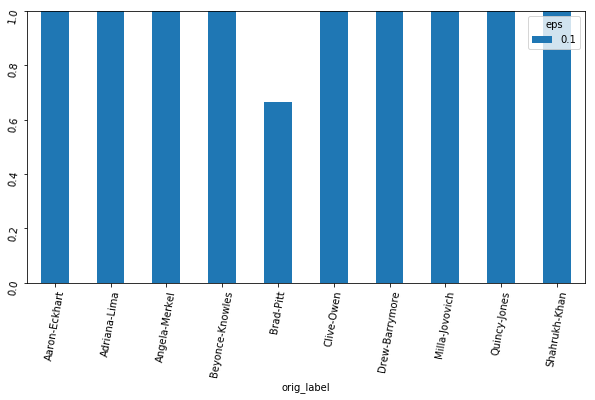

In [35]:
df_eps_fil = df[df['eps'] < 0.2]

per_label_stats = df_eps_fil.groupby(by=['orig_label', 'eps'], as_index=False).mean()

ax = per_label_stats.pivot(index='orig_label', columns='eps', values='successful_attack').plot(kind='bar', figsize=(10, 5))
ax.set_xticks(np.arange(len(idx_to_label)))
ax.set_xticklabels(labels=list(map(lambda idx: idx_to_label[idx], np.arange(len(idx_to_label)))))
ax.tick_params(rotation=80)
ax.set_ylim([0, 1])
plt.show()

## Visualizing the original data in a 2D space

In [21]:
from sklearn import random_projection
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
import seaborn as sns


dataset = utils.load_dataset('pubfig10', 'test')
embeds = np.zeros((len(dataset),512))
labels = np.zeros(len(dataset))

config = {'classif_model_name': 'pubfig_facenet'}
classif_model = utils.load_classification_model('pubfig_facenet')

for idx in range(len(dataset)):
    img, gt_label = dataset[idx]
    
    # Continue if the cropper didn't detect any face.
    if img is None:
        continue
        
    img = utils.preprocess_classifier_input(img, config)
        
    embed = classif_model.model_embedding(img)
    embeds[idx] = embed.detach().cpu().numpy().reshape(-1)
    labels[idx] = gt_label

Loaded classifier: pubfig_facenet.


In [27]:
X_embedded = TSNE(n_components=2).fit_transform(embeds)
# X_embedded = Isomap(n_components=2).fit_transform(embeds)

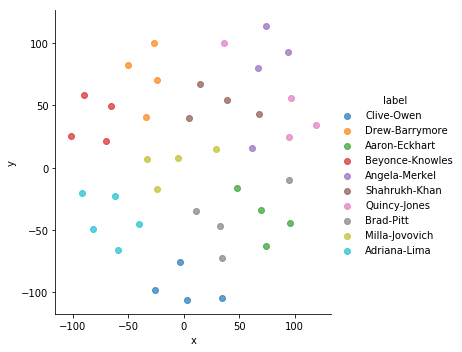

In [28]:
data = [(X_embedded[i][0], X_embedded[i][1], labels[i]) for i in range(len(labels))]
df = pd.DataFrame(data, columns=['x', 'y', 'label'])
df = df.replace({"label": idx_to_label})


import seaborn as sns
facet = sns.lmplot(data=df, x='x', y='y', hue='label', scatter_kws={'alpha':0.7}, 
                fit_reg=False, legend=True, legend_out=True)

## Visualizing the adversarial data in a 2D space

In [45]:
config = {}
config['classif_model_name'] = 'pubfig_facenet'
config['relight_model_name'] = 'dpr'

dpr_modelFolder = '../relighters/DPR/trained_model/'
checkpoint_path = os.path.join(dpr_modelFolder, 'trained_model_03.t7')

relight_model = utils.load_relighting_model(config['relight_model_name'], checkpoint_path)
classif_model = utils.load_classification_model(config['classif_model_name'])

idx_to_label = labels_util.load_idx_to_label('pubfig10')
label_to_idx = {label : idx for idx, label in idx_to_label.items()}

config['attack_type'] = 'class_constrained_eot'
config['target_label'] = 0
config['debugging'] = False
config['num_iterations'] = 10
config['learning_rate'] = 0.02
config['eps'] = 0.1

dataset = utils.load_dataset('pubfig10', 'test')
embeds = np.zeros((2 * len(dataset),512))
labels = np.zeros(2 * len(dataset))
adv_labels = np.zeros(len(dataset))

for idx in range(len(dataset)):
    img, gt_label = dataset[idx]
    
    config['gt_label'] = gt_label
    if gt_label == config['target_label']:
        config['target_label'] = 8

    result = eot_attacks.do_attack(relight_model, classif_model, img, config)
    
    embeds[2 * idx] = classif_model.model_embedding(utils.preprocess_classifier_input(img, config))\
                .detach().cpu().numpy().reshape(-1)
    labels[2 * idx] = gt_label
    labels[2 * idx + 1] = gt_label
    
    if 'root_img' in result:
        adv = utils.preprocess_classifier_input(result['adv_img'], config)
        embed = classif_model.model_embedding(adv)
        embeds[2 * idx + 1] = embed.detach().cpu().numpy().reshape(-1)
        
        
        print('Adv:', adv_labels[idx])
        
    config['target_label'] = 0

Loaded the relighter: dpr.
Loaded classifier: pubfig_facenet.
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0
Adv: 0.0


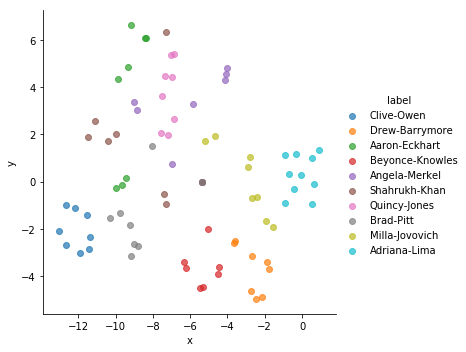

In [53]:
X_embedded = TSNE(n_components=2).fit_transform(embeds)
# X_embedded = Isomap(n_components=2).fit_transform(embeds)

data = [(X_embedded[i][0], X_embedded[i][1], labels[i]) for i in range(len(labels))]
df = pd.DataFrame(data, columns=['x', 'y', 'label'])
df = df.replace({"label": idx_to_label})

facet = sns.lmplot(data=df, x='x', y='y', hue='label', scatter_kws={'alpha':0.7}, 
                fit_reg=False, legend=True, legend_out=True)